In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
'''
pred_y = 1000
y = 1000.0016

sqrt((y-pred_y)^2) = 100

0.004
'''

'\npred_y = 1000\ny = 1000.0016\n\nsqrt((y-pred_y)^2) = 100\n\n0.004\n'

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [4]:
train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

In [5]:
print((train.isna().sum()[train.isna().sum() > 0]))

print("Number of train data: ",len(train))

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64
Number of train data:  1460


In [6]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SalePrice', ylabel='Density'>

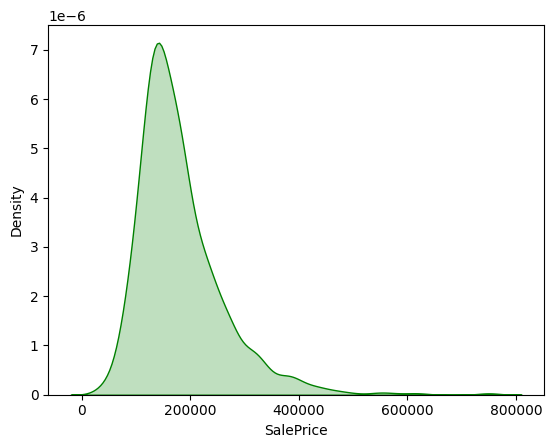

In [7]:
# Sale price plot 
sns.kdeplot(data = train["SalePrice"], fill=True, color = 'green')

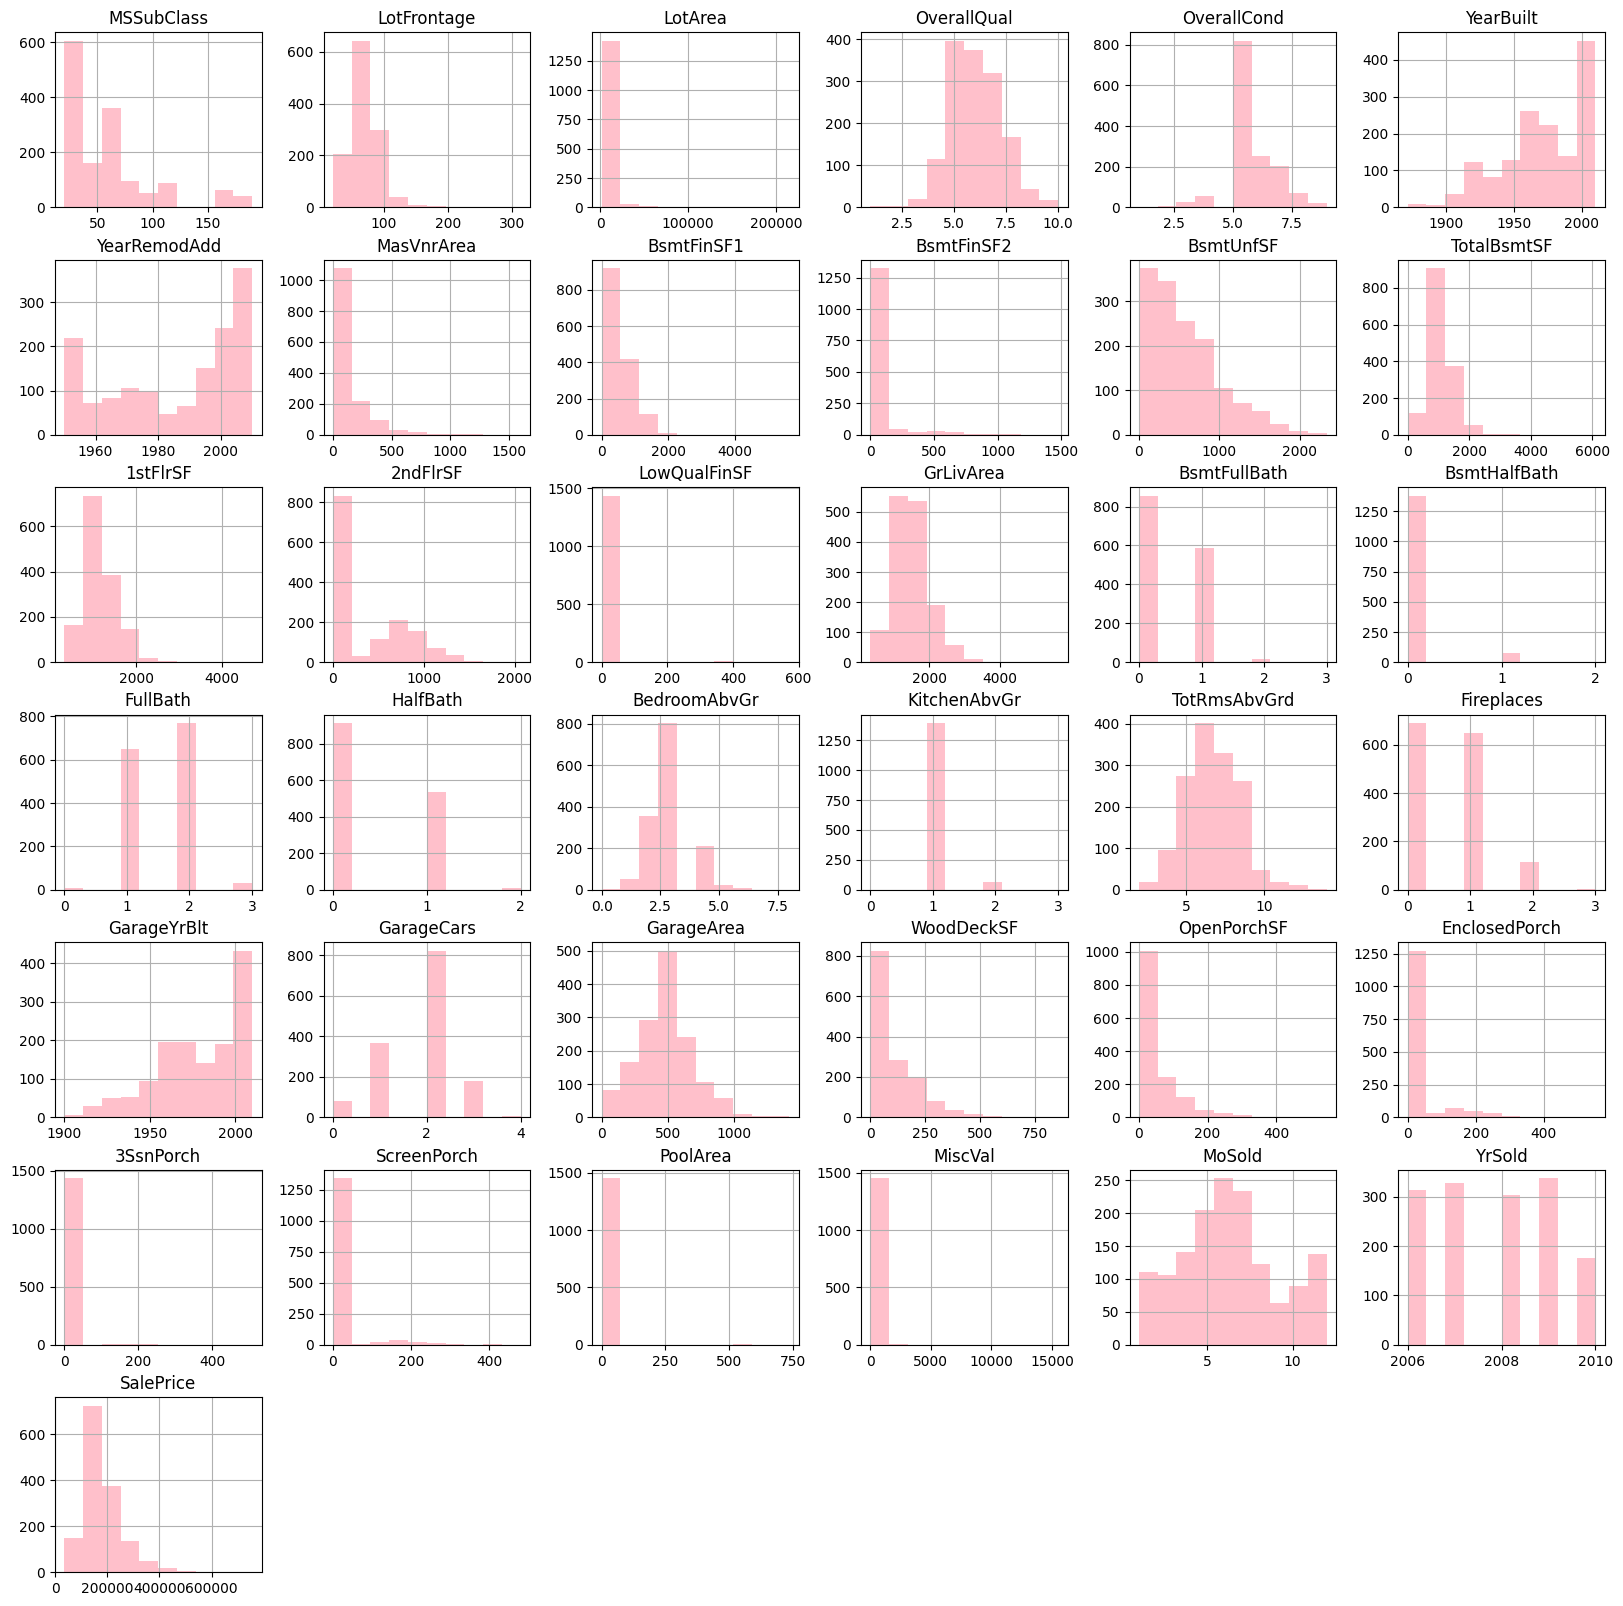

In [8]:
train.drop(columns=['Id']).hist(figsize=(20, 20), xlabelsize=10, ylabelsize=10, color='#ffc0cb')
plt.show()

In [9]:
numerical_columns_train = train.select_dtypes(exclude=['object']).columns.tolist()
numerical_columns_train.remove("Id")

In [10]:
numerical_columns_train

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

<Axes: >

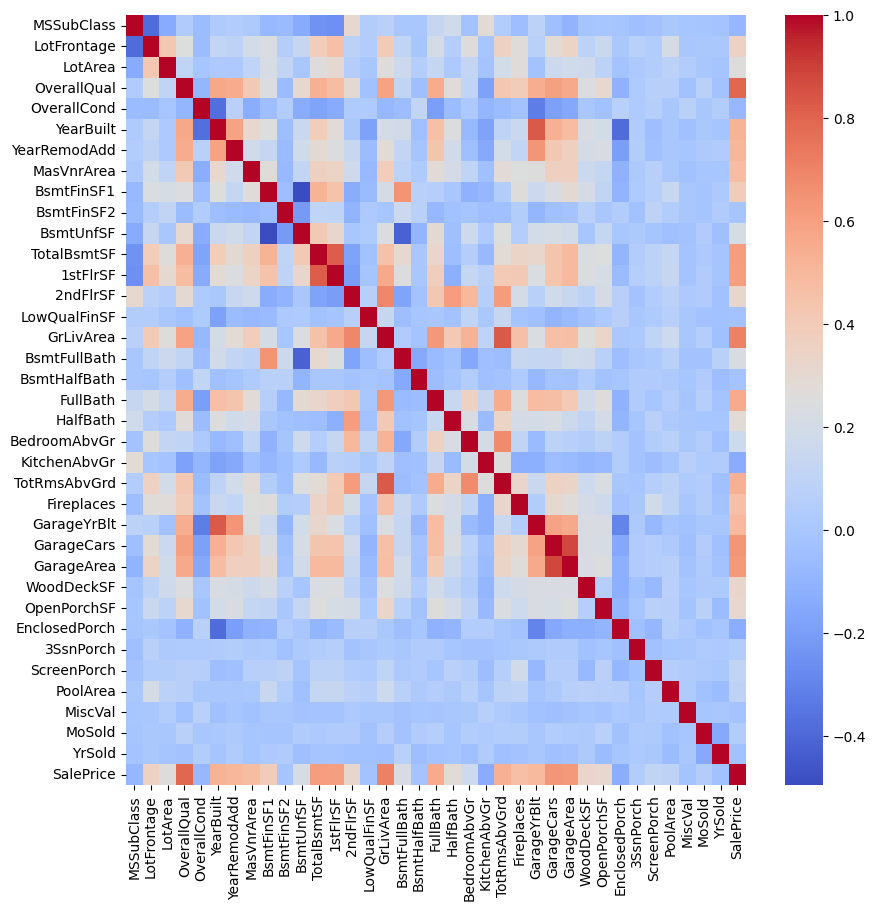

In [11]:
plt.figure(figsize = (10,10))
sns.heatmap(data = train[numerical_columns_train].corr(), annot = False, cmap = 'coolwarm' )

# Categorical

In [12]:
# 범주형 자료 분석


In [13]:
from sklearn.preprocessing import LabelEncoder
categorical_columns_train = train.select_dtypes(include=['object']).columns.tolist()
dic = []
for c in categorical_columns_train:
    lbl = LabelEncoder() 
    lbl.fit(list(train[c].values)) 
    train[c] = lbl.transform(list(train[c].values))
    
    l = LabelEncoder()
    l.fit_transform(train[c].values)
    k = l.classes_
    v = l.transform(k)
    d = dict(zip(k,v))
    dic.append(d)
print("shape all_data : {}".format(train.shape))

shape all_data : (1460, 81)


<Axes: xlabel='OverallQual', ylabel='SalePrice'>

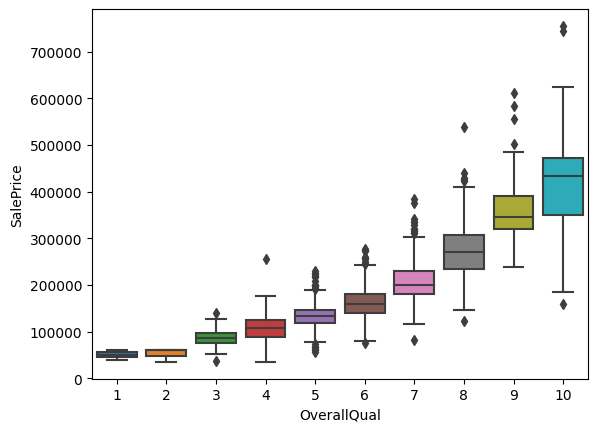

In [14]:
sns.boxplot(x=train["OverallQual"], y=train['SalePrice'])

# Numerical

In [15]:
# 수치형 자료 분석


In [16]:
def remove_outliers(dataset, variables):
    for i, var_name in enumerate(variables):
        q1 = dataset[var_name].quantile(0.25)
        q3 = dataset[var_name].quantile(0.75)
        iqr = q3 - q1
        upper_limit = q3 + 1.5 * iqr
        lower_limit = q1 - 1.5 * iqr
        print('variable name : ', var_name)
        print('Q1 : ', q1)
        print('Q3 : ', q3)
        print('upper limit : ', upper_limit)
        print('lower limit : ', lower_limit)
        print('*' * 20)
        
        dataset[var_name] = np.where(dataset[var_name] > upper_limit, upper_limit, np.where(dataset[var_name]<lower_limit, lower_limit, dataset[var_name]))

In [17]:
numeric_train_df = train.select_dtypes(include = np.number)
numeric_cols = numeric_train_df.columns
remove_outliers(train, numeric_cols)

variable name :  Id
Q1 :  365.75
Q3 :  1095.25
upper limit :  2189.5
lower limit :  -728.5
********************
variable name :  MSSubClass
Q1 :  20.0
Q3 :  70.0
upper limit :  145.0
lower limit :  -55.0
********************
variable name :  MSZoning
Q1 :  3.0
Q3 :  3.0
upper limit :  3.0
lower limit :  3.0
********************
variable name :  LotFrontage
Q1 :  59.0
Q3 :  80.0
upper limit :  111.5
lower limit :  27.5
********************
variable name :  LotArea
Q1 :  7553.5
Q3 :  11601.5
upper limit :  17673.5
lower limit :  1481.5
********************
variable name :  Street
Q1 :  1.0
Q3 :  1.0
upper limit :  1.0
lower limit :  1.0
********************
variable name :  Alley
Q1 :  2.0
Q3 :  2.0
upper limit :  2.0
lower limit :  2.0
********************
variable name :  LotShape
Q1 :  0.0
Q3 :  3.0
upper limit :  7.5
lower limit :  -4.5
********************
variable name :  LandContour
Q1 :  3.0
Q3 :  3.0
upper limit :  3.0
lower limit :  3.0
********************
variable name :  Uti

# Normalization

In [18]:
## 범주형 + 수치형 컬럼 통합
## 컬럼별 데이터 Noramlize (0-1)

In [19]:
data = pd.concat([train, test])
data.fillna(0, inplace=True)

In [20]:
data.drop("Id", axis=1, inplace=True)
column_to_drop = ['GarageArea','2ndFlrSF','GarageYrBlt','TotRmsAbvGrd']
data.drop(column_to_drop, axis=1, inplace=True)

In [21]:
#로그변환 : 로그 변환은 데이터의 분포를 정규분포에 가깝게 만들거나, 특정 모델에 적합하게 만들기 위해 종종 사용
data["YearBuilt"] = data["YearBuilt"].apply(lambda x : np.log(x))
data["LotArea"]   = data["LotArea"].apply(lambda x : np.log(x))

In [22]:
#범주형, 숫자형 리스트 생성
categrocial_features = data.select_dtypes(include = ["object"]).columns
numerical_features = data.select_dtypes(exclude=["object"]).columns.tolist()
numerical_features.remove('SalePrice')

In [23]:
#각각 독립변수와 종속변수
y = train["SalePrice"]
X = pd.get_dummies(data.drop("SalePrice", axis = 1))

In [24]:
#표준화
scaler = StandardScaler() #표준화 객체 생성
X[numerical_features] = scaler.fit_transform(X[numerical_features]) #숫자형변수들 표준화

In [25]:
#kmeans클러스팅 : 데이터를 클러스터로 그룹화 
num_clusters = 5 #클러스터 개수
kmeans = KMeans(n_clusters=num_clusters) #클러스팅 모델 생성

kmeans.fit(X[numerical_features]) #k-means모델을 숫자형변수에 적합시킴
cluster_labels = kmeans.labels_ #각 데이터포인트의 클러스터레이블을 얻음

X['cluster'] = cluster_labels #새로운 열로 추가
X['cluster'] = X['cluster'] 
X['cluster'] = X['cluster'].astype('int') #정수형으로 변환

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [26]:
#종속변수
y = y.apply(lambda x : np.log(x)) #종속변수를 로그변환
y = y.values.reshape(-1, 1) #종속변수 형태를 재구성
y = scaler.fit_transform(y) #종속변수를 표준화
y= pd.DataFrame(y, columns=['SalePrice'])
y

,SalePrice
0,0.612476
1,0.246843
2,0.795638
3,-0.437616
4,1.091052
...,...
1455,0.150693
1456,0.631376
1457,1.259556
1458,-0.397899


In [27]:
#학습용과 검증용으로 나눔
X_t = X.iloc[:len(train), :]
X_test = X.iloc[len(train):, :]


X_train, X_val ,y_train,y_val = train_test_split(X_t, y, test_size=0.01, random_state=42)

/tmp/ipykernel_18/3775992400.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['SalePrice'], fit=stats.norm)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SalePrice', ylabel='Density'>

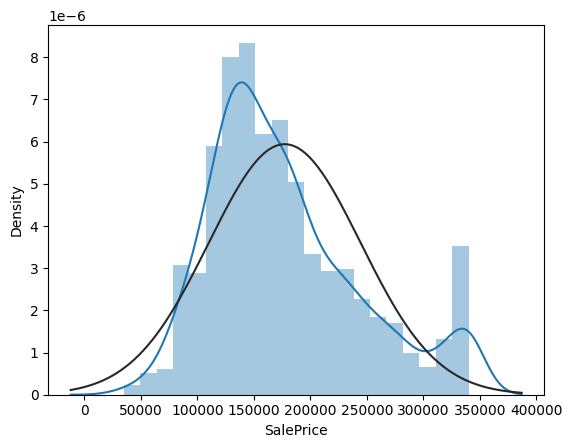

In [28]:
#정규분포
from scipy import stats
sns.distplot(train['SalePrice'], fit=stats.norm)

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 34900. ,  35311. ,  37900. , ..., 340037.5, 340037.5, 340037.5])),
 (65222.05779237982, 177331.52636986302, 0.9688801843087649))

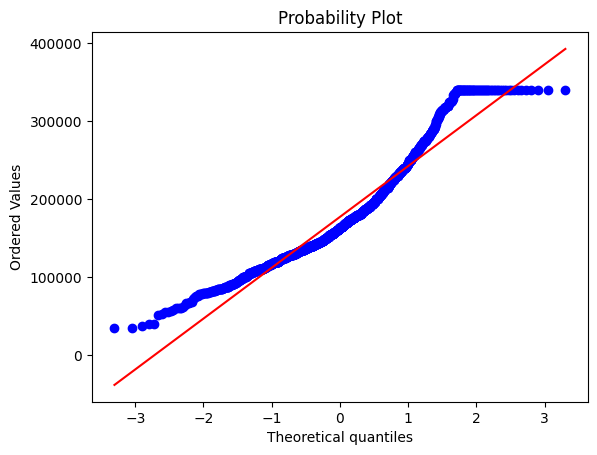

In [29]:
#정규성 확인
stats.probplot(train['SalePrice'], plot=plt)

/tmp/ipykernel_18/279837605.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['SalePrice'], fit=stats.norm)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SalePrice', ylabel='Density'>

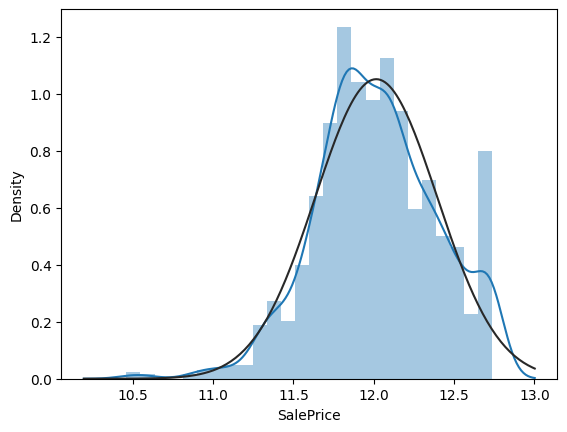

In [30]:
#로그변환 : 정규성 만들어주기위해서
train['SalePrice'] = np.log1p(train["SalePrice"])
sns.distplot(train['SalePrice'], fit=stats.norm)

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([10.46027076, 10.47197813, 10.54273278, ..., 12.73681413,
         12.73681413, 12.73681413])),
 (0.3771225516356591, 12.015390605642365, 0.9922939267166456))

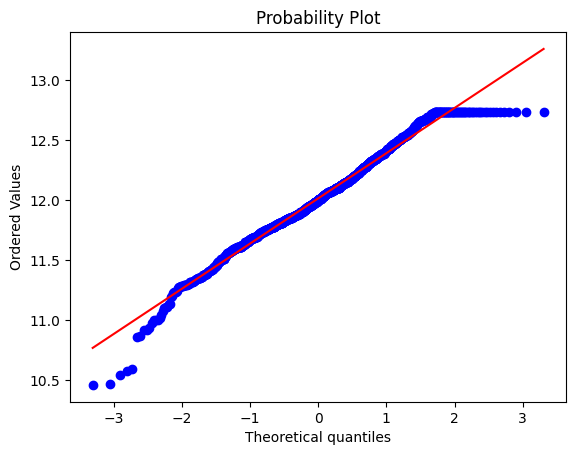

In [31]:
stats.probplot(train['SalePrice'], plot=plt)

# Modeling

In [32]:
# modeling

In [33]:
#XGBoost

from sklearn.model_selection import cross_val_score
#파라미터 설정
param = {
    'max_depth': 4,            
    'objective': 'reg:squarederror',  
    'learning_rate': 0.1,   
    'n_estimators': 300,       
    'subsample': 0.79,          
    'colsample_bytree': 0.8,    
    'eval_metric': 'rmse'       
}


model = XGBRegressor(**param) #모델생성
model.fit(X_train, y_train) #모델을 학습데이터로 학습
y_pred = model.predict(X_val) #학습된 모델을 사용해 검증데이터에대한 예측수행

mse = mean_squared_error(y_val, y_pred) #검증데이터에 대한 예측값-실제값의 평균제곱오차(MSE)를 계산
print("Mean squarred error on validation set:", mse)

scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5) #교차검증
print("cross validated :", -scores.mean()) # 교차 검증 결과의 음수 평균을 출력

Mean squarred error on validation set: 0.10432791316917597
cross validated : 0.10852149074065391


In [34]:
#randomforest

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
#파라미터 설정
param = {
    'max_depth':4,
    'random_state':42
}
model = RandomForestRegressor(**param) #모델생성
model.fit(X_train, y_train) #모델을 학습데이터로 학습
y_pred = model.predict(X_val) #학습된 모델을 사용해 검증데이터에 대한 예측수행

mse = mean_squared_error(y_val, y_pred) #검증데이터에 대한 예측값-실제값의 평균제곱오차(MSE)를 계산
print("Mean squarred error on validation set:", mse)

scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5) #교차검증
print("cross validated :", -scores.mean()) # 교차 검증 결과의 음수 평균을 출력

/tmp/ipykernel_18/3940830697.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train) #모델을 학습데이터로 학습


Mean squarred error on validation set: 0.12217929190927478


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

cross validated : 0.19950988074438847


In [35]:
#gradient boost

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
#파라미터 설정
param = {
    'max_depth':4,
    'learning_rate':0.1,
    'n_estimators':300,
    'subsample':0.8,
    'random_state':42
}
model = GradientBoostingRegressor(**param) #모델생성
model.fit(X_train, y_train) #모델을 학습데이터로 학습
y_pred = model.predict(X_val) #학습된 모델을 사용해 검증데이터에 대한 예측수행

mse = mean_squared_error(y_val, y_pred) #검증데이터에 대한 예측값-실제값의 평균제곱오차(MSE)를 계산
print("Mean squarred error on validation set:", mse)

scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5) #교차검증
print("cross validated :", -scores.mean()) # 교차 검증 결과의 음수 평균을 출력

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean squarred error on validation set: 0.08164957828411648


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

cross validated : 0.11168983387232442


In [36]:
y_test = model.predict(X_test) #학습된 모델 사용해 테스트데이터 예측
y_unscaled = scaler.inverse_transform(y_test.reshape(-1, 1)) #예측값을 다시 역변환
y_sub = pd.DataFrame({'SalePrice': np.exp(y_unscaled).flatten()}) #지수함수를 사용해 원래값으로 되돌림
submission = pd.DataFrame({'Id': test['Id'], 'SalePrice': y_sub["SalePrice"] }) 

# Submission Creation

In [37]:
submission 

,Id,SalePrice
0,1461,127154.863702
1,1462,167370.522031
2,1463,179882.642730
3,1464,187045.060334
4,1465,166197.520215
...,...,...
1454,2915,84656.340749
1455,2916,83819.803780
1456,2917,186556.722732
1457,2918,112248.164364
